<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Workshop2_Advanced_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Central limit theorem

2.1 The Uniform Probability Distribution

Nota: Teóricamente el valor esperado es la media teórica de las variables aleatorias de acuerdoa su distrubución de probabilidad.

Por otra parte la varianza de




In [45]:
pip install symbulate

2.2 Monte Carlo simulation


In [46]:
from symbulate import *
#'exec(%matplotlib inline)'
import matplotlib

import matplotlib.pyplot as plt

Simulación de números aleatorios con una distribución normal

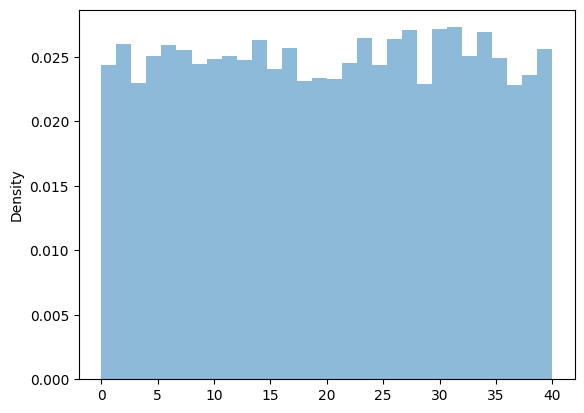

In [47]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Uniform(0,40)
# Define X as a random variable of the type P (uniform)
X =RV(P)
# Simulate the values of X and save the in the x array:
x=X.sim(10000)
x.plot()
plt.show()

2.2 Reto
Calcular la media y desviación estándar y compararla con las teóricas

Nota: La varianza teórica (b-a)^2/12 es resultado de analizar una variable aleatoria con la teoría de la probabilidad y unas derivadas por ahí :)




In [48]:
import pandas as pd

array = np.array(x)
df = pd.DataFrame(x)

x_stats=df.describe().T
print(type(x_stats))
print(x_stats)

theoric_mean=(40-0)/2
theoric_var=(40-0)**2/12
theoric_std=(theoric_var)**(1/2)


print("Media real: %2f vs media teórica: %2f"%(x_stats["mean"],theoric_mean))
print("Desviación estándar real: %2f vs desviación estándar teórica: %2f"%(x_stats["std"],theoric_std))




<class 'pandas.core.frame.DataFrame'>
     count       mean      std      min       25%       50%        75%  \
0  10000.0  20.062729  11.5328  0.00189  10.04498  20.26498  30.113567   

         max  
0  39.995412  
Media real: 20.062729 vs media teórica: 20.000000
Desviación estándar real: 11.532800 vs desviación estándar teórica: 11.547005


Hemos encontrado que la media real y la media teórica son casi identicas a las reales.

In [49]:
# Define the probability space as a vector of 25 uniform random numbers:
P = Uniform(0,40) ** 25
# Define XVECTOR as a vector of random variables with 25 random values
XVECTOR =RV(P)
# Simulate 10,000 vectors to get a matrix
xmatrix=XVECTOR.sim(10000)

In [50]:
xmatrix


0,"(5.607148168241367, 10.25641514470033, 39.22996429095081, 6.674756703634861, 11.869234113840768, ......"
1,"(36.431928498303485, 5.752821548170397, 38.049604477043545, 10.423476561559056, 26.148466511321267, ..."
2,"(29.247860560944446, 8.6484729176412, 31.949580164624336, 20.237120084304323, 1.992050972408732, ......"
3,"(3.6696406581016827, 26.75584566622919, 13.222992416000778, 27.743538582842895, 26.756787710511215, ..."
4,"(19.59398535846892, 4.531473017903442, 15.391622060438852, 33.05177444989225, 10.918864565381647, ....."
5,"(28.93579628807656, 8.728889432013087, 27.137607732434432, 3.4473499864407575, 36.318790959085, ...,..."
6,"(38.41357994183681, 10.226064318180988, 2.9041044763667623, 13.68743946021044, 12.641803924641387, ...."
7,"(27.299707872948726, 4.948957922324908, 22.689176638741742, 25.02204715022332, 32.445497293808316, ...."
8,"(26.13617044578127, 14.250150305900098, 18.990988828814647, 2.376020610246292, 13.189313369447673, ...."
...,...
9999,"(11.570047133354834, 4.380726827516401, 10.365911537781036, 14.080170753440285, 0.33856912569115494,..."


In [51]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers:
xmean = RV(P,mean).sim(10000)
xmean

0,18.364941996343653
1,19.38483523979681
2,14.612314182691804
3,19.205651521355218
4,18.85554365608467
5,17.70617780383135
6,19.072263925445487
7,17.941521382081284
8,23.332283788991678
...,...
9999,21.851054498250768


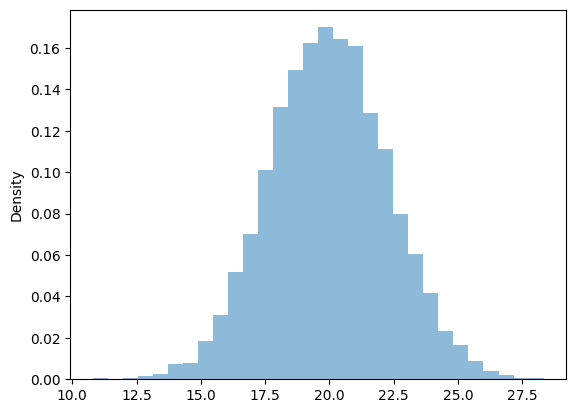

In [52]:
plt.clf()
xmean.plot()
plt.show()

2.3 Calcular la media y desviación estándar de x_mean y con las de x

In [53]:
array = np.array(xmean)
df_x_mean = pd.DataFrame(xmean)

xmean_stats=df_x_mean.describe().T
print(type(xmean_stats))
print(xmean_stats)


print("Media xmean: %2f vs media de x: %2f"%(xmean_stats["mean"],x_stats["mean"]))
print("Desviación estándar xmean: %2f vs desviación estándar de x: %2f"%(xmean_stats["std"],x_stats["std"]))

<class 'pandas.core.frame.DataFrame'>
     count       mean       std        min       25%        50%        75%  \
0  10000.0  19.987431  2.300491  10.794262  18.40758  19.973344  21.528269   

         max  
0  28.330819  
Media xmean: 19.987431 vs media de x: 20.062729
Desviación estándar xmean: 2.300491 vs desviación estándar de x: 11.532800


A pesar de que el promedio se mantiene. La desviación estándar se reduce dado el comportamiento normal de los datos. En específico tenemos 2.3 de desviación esperada donde teóricamente con una desviación estándar de 2 tendrémos 95% de los datos. Esto significa que los promedios aleatorios se comportan de manera similar y alrededor de la media teórica. Mejor que los calcúlos aleatorios.


Simulating numbers with the NORMAL probability distribution

2.2.4 Simulando numeros con la distribución de probabilidad normal


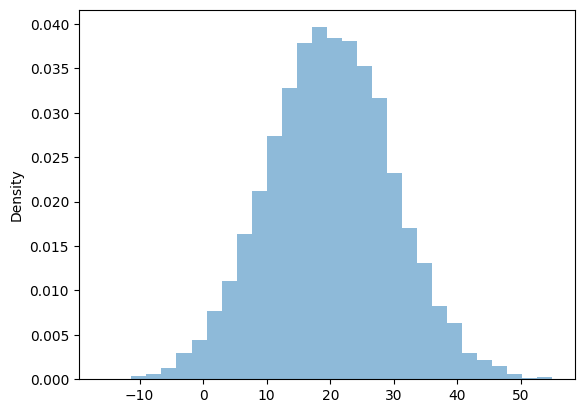

In [54]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Normal(mean=20, sd=10)
# Define Y as a random variable of the type P (normal)
Y =RV(P)
# Simulate 10,000 values of Y and save the in the x array:
y=Y.sim(10000)
y.plot()
plt.show()

Graficamos ambos histogramas, los de los datos aleatorios y los promedios de muestras aleatorias. La distribución de los promedios tiene más bien un comportamiento normal.

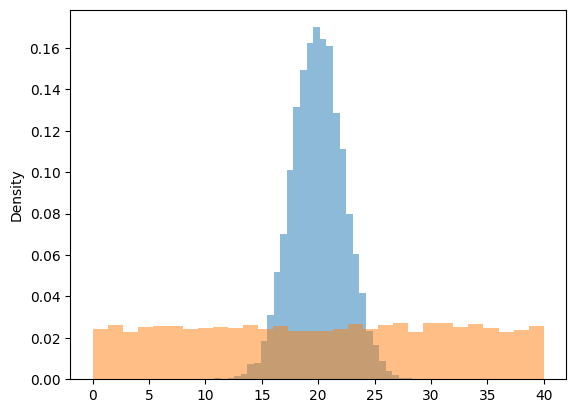

In [55]:
plt.clf()
xmean.plot()
x.plot()
plt.show()

2.4
Simular los datos con una probabilidad de distribución donde la media es 20 y la desciación estándar de 10

In [56]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Normal(mean=20, sd=10)
# Define Y as a random variable of the type P (normal)
Y =RV(P)

# Simulate 10,000 values of Y and save the in the x array:
y=Y.sim(10000)
print(y)

Index Result
0     4.956076914315215
1     20.042101977819105
2     32.73465035727666
3     9.654289139852912
4     11.663199891002687
5     14.574209043032557
6     30.853299305431403
7     33.46667059339521
8     19.91624460392859
....  ..................
9999  28.778243928260363


<Figure size 640x480 with 0 Axes>

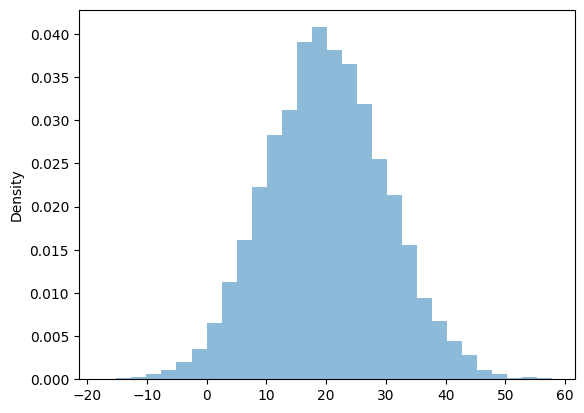

In [57]:
y.plot()
plt.show()

Calculemos la media y desviación estándar de los datos:


In [58]:
print(y)
y_mean= 0
y_std=0
print("Datos reales a partir de la función con media 20 y std 10)\n Media real: %2f \n std real: %2f "%(y_mean,y_std))



Index Result
0     4.956076914315215
1     20.042101977819105
2     32.73465035727666
3     9.654289139852912
4     11.663199891002687
5     14.574209043032557
6     30.853299305431403
7     33.46667059339521
8     19.91624460392859
....  ..................
9999  28.778243928260363
Datos reales a partir de la función con media 20 y std 10)
 Media real: 0.000000 
 std real: 0.000000 


2.2.5

Calcular la media y desviación estándar the los datos aleatorios.

CALCULATE THE MEAN AND STANDARD DEVIATION OF THIS RANDOM y VARIABLE. HOW SIMILAR OR DIFFERENT ARE THESE VALUES FROM THE MEAN AND STANDARD DEVIATION OF THE THEORETICAL MEAN (20) AND THE THEORETICAL STANDARD DEVIATION (10)?



REVISAR ESTO MAS TARDE: COMO CALCULAR LA MEDIA Y STD DE Y????

In [59]:

# Define the probability space P as a vector of 25 normal random numbers:
P = Normal(mean=20, sd=10) ** 25
# Define RANDOMVECTOR as a vector of 25 random variables in the Probability space P
RANDOMVECTOR = RV(P)
# Simulate 10,000 random vectors with this distribution and save the in ymatrix:
ymatrix=RANDOMVECTOR.sim(10000)

In [60]:
ymatrix

0,"(13.692384074293283, 30.415576990220536, 10.79089081054703, 20.6305177907455, 31.939114611602776, ....."
1,"(13.90468949527955, 17.51971387234589, 9.051794111601417, 33.65326682421143, 21.527968710838017, ......"
2,"(23.515998909171273, 9.627804288482292, 26.405062102823948, 15.903225743901768, -2.8120771880031405,..."
3,"(8.209628252918568, 31.430389592774652, 22.623020719865124, 32.246998719633275, 24.8373955904528, ....."
4,"(23.95260365741865, 33.44572886616136, 26.071926016179702, 14.048311012909359, 8.659019798867401, ....."
5,"(7.823795498293629, 38.97814847268803, 17.578005989255843, 31.212917591251692, 16.713340930128563, ...."
6,"(29.534645514646762, 34.31644020152319, 8.379223075281427, 23.01264511357274, 17.417445126541235, ....."
7,"(12.00020343812431, 15.36269201497128, 11.861958724533658, 12.985987946859591, 28.15983419720618, ....."
8,"(5.818500277086313, 21.199340058025314, 5.096550537967591, 20.865376735944093, 0.36508572049485366, ..."
...,...
9999,"(19.076985319550975, 21.828264784476797, 8.108167581671047, 18.94868386909857, 17.821064582970536, ...."


In [61]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers:
ymean = RV(P,mean).sim(10000)
ymean

0,18.037077330541475
1,18.102799261458667
2,16.53046168399985
3,21.15891856779583
4,20.374693489044752
5,21.308277200543458
6,20.80867923701089
7,21.105089260561105
8,22.07371224981029
...,...
9999,22.136825798569966


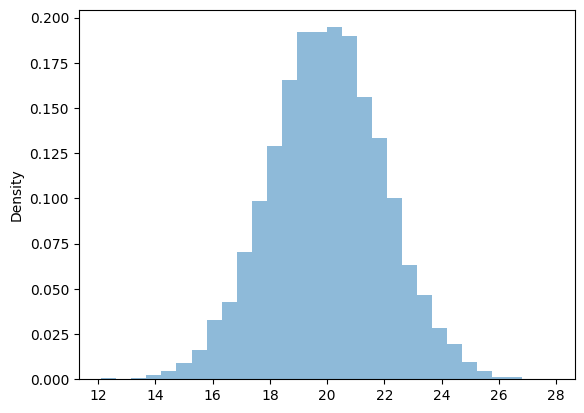

In [62]:
plt.clf()
ymean.plot()
plt.show()

2.2.6

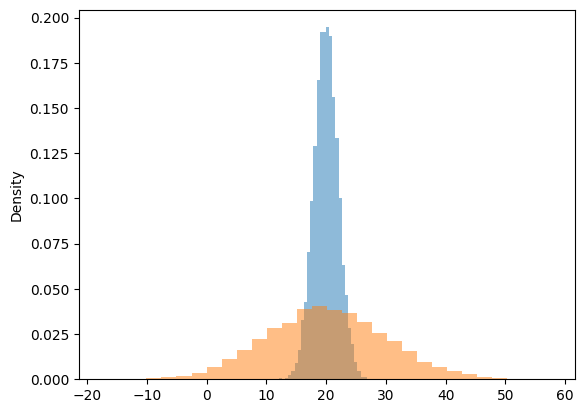

In [63]:
plt.clf()
ymean.plot()
y.plot()
plt.show()

Notas: La varianza de una suma es la suma de las varianzas. Pero no sucede lo mismo con las desviaciones estándar


**Resumen e importancia del Teorema del limite central**
Nos dice que

*   Dada una muestra aleatoria de datos. Si analizamos cualquier combinación lineal
 (Como promedios ponderados o media aritmetica) los resultados se comportarán de manera normal. Donde los datos se distribuyen en el 68% a +- 1 std, 95% en +-2 std y 99% en +- 3std de la media.
*   Tambien tenemos que la std de la combinación lineal respecto a la std de los datos originales se ve reducida en 1/raiz de n, donde n es el número de datos.



4- Hypothesis testing


Se usa para validar las hipótesis en una investigación. Donde se parte a partir de una hipótesis que quieres validar y una hipótesis nula.

H0: Null Hypótesis (Diablito-> Opuesta a tu hipotesis) Se da por hecho que la hip+otesis nula es opuesta de principio

Ha: La hipótesis que quieres demostrar. Se busca reducir la probabilidad de que tu hipótesis esté mal.


Es importante hacer estas pruebas para tener evidencia estadística significativa donde el margen de error comunmente aceptado es del 5%

*   P value: Margen de error de tu hipotesis
*  T value: Número de std que tienes que moverte para llegar al valor de la hipótesis nula.
*   Error estandar es la std de la variable de análisis.

El factor 1/n solo aplica para promedios.





4.1 Calcular el retorno de inversión de Microsoft en los últimos años y determiar si combiene invertir en microsoft


In [64]:
import yfinance as yf

MSFT=yf.download(tickers="MSFT", start="2019-01-01",interval="1mo")
MSFT

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,99.550003,107.900002,97.199997,104.430000,99.578087,714212800
2019-02-01,103.779999,113.239998,102.349998,112.029999,106.824997,469095900
2019-03-01,112.889999,120.820000,108.800003,117.940002,112.940697,589095800
2019-04-01,118.949997,131.369995,118.099998,130.600006,125.064049,433157700
2019-05-01,130.529999,130.649994,123.040001,123.680000,118.437378,547218800
2019-06-01,123.849998,138.399994,119.010002,133.960007,128.756470,508324300
2019-07-01,136.630005,141.679993,134.669998,136.270004,130.976730,484079900
2019-08-01,137.000000,140.940002,130.779999,137.860001,132.505005,584482000
2019-09-01,136.610001,142.369995,134.509995,139.029999,134.074509,472544800


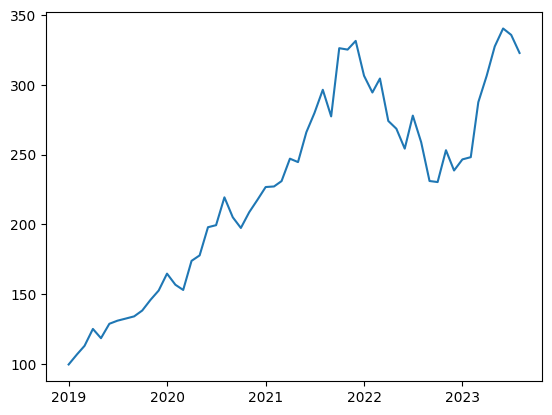

In [65]:
import matplotlib
from matplotlib.pyplot import*
plot(MSFT["Adj Close"])
show()

In [66]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2019-01-01 to 2023-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       56 non-null     float64
 1   High       56 non-null     float64
 2   Low        56 non-null     float64
 3   Close      56 non-null     float64
 4   Adj Close  56 non-null     float64
 5   Volume     56 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.1 KB


In [67]:
MSFT["R"] = (MSFT["Adj Close"] / MSFT["Adj Close"].shift(1)) - 1
print(MSFT["R"])

Date
2019-01-01         NaN
2019-02-01    0.072776
2019-03-01    0.057250
2019-04-01    0.107343
2019-05-01   -0.052986
2019-06-01    0.087127
2019-07-01    0.017244
2019-08-01    0.011668
2019-09-01    0.011845
2019-10-01    0.031216
2019-11-01    0.055869
2019-12-01    0.045294
2020-01-01    0.079454
2020-02-01   -0.048288
2020-03-01   -0.023883
2020-04-01    0.136326
2020-05-01    0.022543
2020-06-01    0.113652
2020-07-01    0.007371
2020-08-01    0.100093
2020-09-01   -0.065142
2020-10-01   -0.037370
2020-11-01    0.057292
2020-12-01    0.041726
2021-01-01    0.042892
2021-02-01    0.001811
2021-03-01    0.016925
2021-04-01    0.069602
2021-05-01   -0.009914
2021-06-01    0.087494
2021-07-01    0.051717
2021-08-01    0.059563
2021-09-01   -0.064331
2021-10-01    0.176291
2021-11-01   -0.003106
2021-12-01    0.019194
2022-01-01   -0.075345
2022-02-01   -0.039199
2022-03-01    0.033995
2022-04-01   -0.099867
2022-05-01   -0.020359
2022-06-01   -0.053120
2022-07-01    0.093097
2022-0

In [68]:
MSFT["r"] = np.log(MSFT['Adj Close']) - np.log(MSFT['Adj Close'].shift(1))
MSFTR = MSFT[['R','r']].copy()

In [69]:
sumret = MSFT["R"].describe()
sumret

count    55.000000
mean      0.023608
std       0.064308
min      -0.107376
25%      -0.022121
50%       0.022543
75%       0.067267
max       0.176291
Name: R, dtype: float64

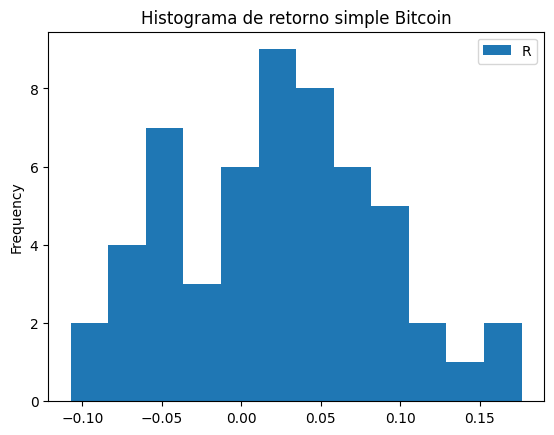

In [70]:
R_MSFT= pd.DataFrame(MSFTR[["R"]])
hist=R_MSFT.plot.hist(bins=12,title="Histograma de retorno simple Bitcoin")


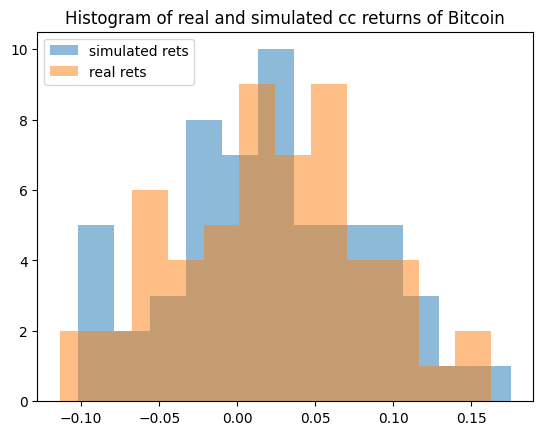

In [71]:
from matplotlib import pyplot
pyplot.clf()
rmean = MSFTR["r"].mean()
rsd = MSFTR["r"].std()
N = MSFTR["r"].count()
simr= np.random.normal(loc=rmean,scale=rsd, size=N)
realr = MSFTR["r"].to_numpy()

bins = 12

pyplot.hist(simr,bins,alpha=0.5,label='simulated rets')
pyplot.hist(realr,bins,alpha=0.5,label='real rets')
pyplot.legend(loc='upper left')
pyplot.title(label='Histogram of real and simulated cc returns of Bitcoin')

pyplot.show()